
# 📘 Chapter 14: Decision Trees

This chapter presents **Decision Trees** for classification and regression. The exposition is in third‑person, textbook style with LaTeX equations and runnable examples.



## 14.1 Intuition: Recursive Partitioning

A decision tree performs **recursive partitioning** of the feature space into axis‑aligned regions. Each internal node selects a feature and a threshold, splitting the data into two child nodes. Leaves output a **class label** (classification) or a **constant value** (regression).

Decision trees are **non‑parametric**, naturally handle mixed feature scales (no need to standardize), and offer interpretability via their structure.



## 14.2 Impurity Measures

At a node containing samples with class proportions \(p_1,\dots,p_K\), impurity quantifies label heterogeneity.

- **Entropy (ID3/C4.5):**
$$
H(p) \;=\; - \sum_{k=1}^{K} p_k \log_2 p_k \, .
$$

- **Gini (CART):**
$$
G(p) \;=\; 1 \;-\; \sum_{k=1}^{K} p_k^{\,2} \, .
$$

- **Misclassification error (less used for splits):**
$$
E(p) \;=\; 1 \;-\; \max_k p_k \, .
$$

Lower values indicate purer nodes.



## 14.3 Split Criteria: Information Gain (Entropy) and Gini Decrease

Given a parent node \(S\) split into children $(S_L$) and $(S_R$), the **information gain** (entropy) is
$$
\mathrm{IG}(S;\text{split}) \;=\; H(S) \;-\; \Bigg( \frac{|S_L|}{|S|} H(S_L) \;+\; \frac{|S_R|}{|S|} H(S_R) \Bigg).
$$

CART maximizes the **Gini decrease**, which has the same weighted‑impurity reduction form with \(G(\cdot)\) instead of \(H(\cdot)\).



## 14.4 Stopping and Pruning

Without constraints, trees can **overfit**. Common controls:

- **Max depth** (`max_depth`)  
- **Min samples to split** (`min_samples_split`)  
- **Min samples per leaf** (`min_samples_leaf`)  
- **Cost‑complexity pruning** (CART): prune subtrees to minimize
$$
R_\alpha(T) \;=\; R(T) \;+\; \alpha \, |T| \, ,
$$
where \(R(T)\) is the empirical loss of tree \(T\), \(|T|\) counts leaves, and \(\alpha \ge 0\) controls complexity.



## 14.5 Features, Missing Values, and Scaling

- Trees handle **numerical** features directly; **categorical** features are typically one‑hot encoded in scikit‑learn.  
- Missing values should be imputed prior to fitting.  
- Trees are **scale‑invariant**; feature standardization is not required for splits.



## 14.6 Pros and Cons

**Pros**: interpretability, handles non‑linearities and interactions, little preprocessing.  
**Cons**: high variance (unstable to small data changes), axis‑aligned splits, tendency to overfit without pruning.



## 14.7 Hands‑On A: DecisionTreeClassifier on Iris

The following fits a tree using both **Gini** (default) and **Entropy**, reports accuracy, depth, and number of leaves, and visualizes the structure.


Gini  - acc: 0.895, depth: 6, leaves: 9
Entropy - acc: 0.895, depth: 6, leaves: 9


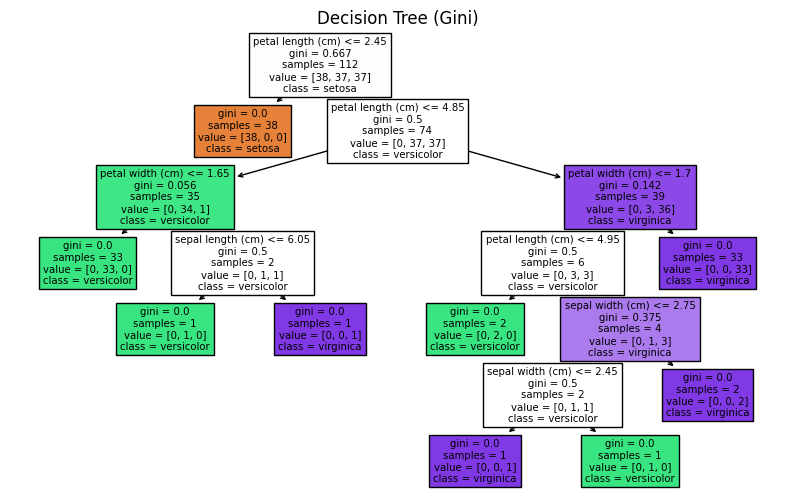

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Gini tree
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

# Entropy tree
clf_ent = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_ent.fit(X_train, y_train)
y_pred_ent = clf_ent.predict(X_test)

print("Gini  - acc: %.3f, depth: %d, leaves: %d" % (accuracy_score(y_test, y_pred_gini), clf_gini.get_depth(), clf_gini.get_n_leaves()))
print("Entropy - acc: %.3f, depth: %d, leaves: %d" % (accuracy_score(y_test, y_pred_ent), clf_ent.get_depth(), clf_ent.get_n_leaves()))

# Visualize the gini tree (separate figure; default style)
plt.figure(figsize=(10, 6))
plot_tree(clf_gini, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree (Gini)")
plt.show()



## 14.8 Hands‑On B: Decision Regions (2D Subset)

A 2‑feature subset (`petal length`, `petal width`) is used to visualize decision regions.


c:\Users\zeelp\anaconda3\envs\ml-gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


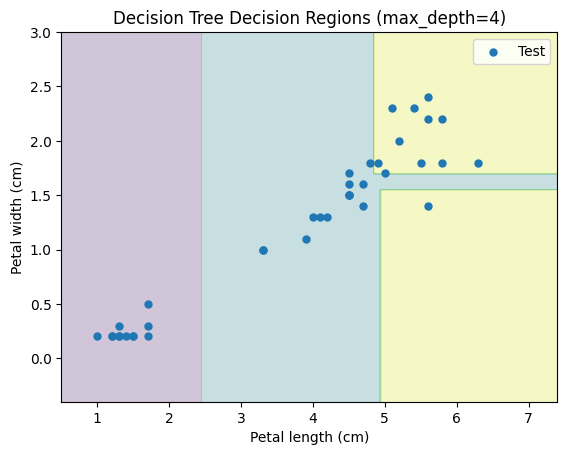

In [2]:

# Use two features for 2D visualization
X2 = X[['petal length (cm)', 'petal width (cm)']]
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.25, random_state=42, stratify=y
)

tree2 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree2.fit(X2_train, y2_train)

# Grid for decision regions
x_min, x_max = X2.iloc[:, 0].min() - 0.5, X2.iloc[:, 0].max() + 0.5
y_min, y_max = X2.iloc[:, 1].min() - 0.5, X2.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = tree2.predict(grid).reshape(xx.shape)

# Plot decision regions and test points (separate figure, default styles)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X2_test.iloc[:, 0], X2_test.iloc[:, 1], s=25, label="Test")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Decision Tree Decision Regions (max_depth=4)")
plt.legend()
plt.show()



## 14.9 Hands‑On C: Tuning `max_depth` via Cross‑Validation

A grid search selects the best tree depth; performance is then evaluated on the test set.


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {"max_depth": list(range(1, 11))}

# Use n_jobs=1 on Windows to avoid TerminatedWorkerError
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=1,              # was -1; single process is more reliable on some setups
    verbose=1,
    error_score='raise'
)

grid.fit(X_train, y_train)  # <- removed the stray space

best = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)
print("Test accuracy:", best.score(X_test, y_test))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'max_depth': 3}
Best CV score: 0.9375494071146244
Test accuracy: 0.8947368421052632



## 14.10 Hands‑On D: DecisionTreeRegressor (Synthetic Data)

A regression tree is fit to a noisy 1‑D function; depth controls smoothness (over/under‑fitting).


Depth=2: MSE=0.3946, R^2=0.2917


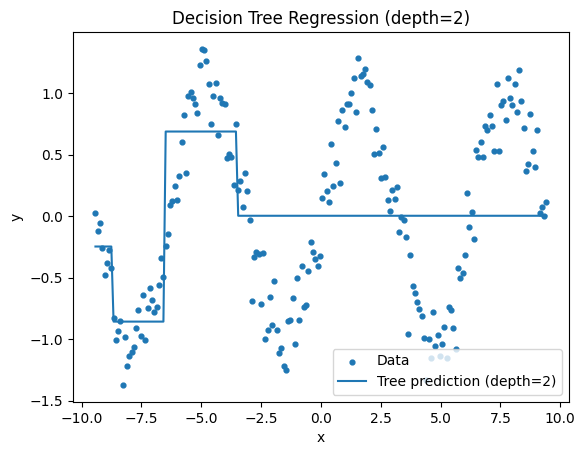

Depth=4: MSE=0.2124, R^2=0.6189


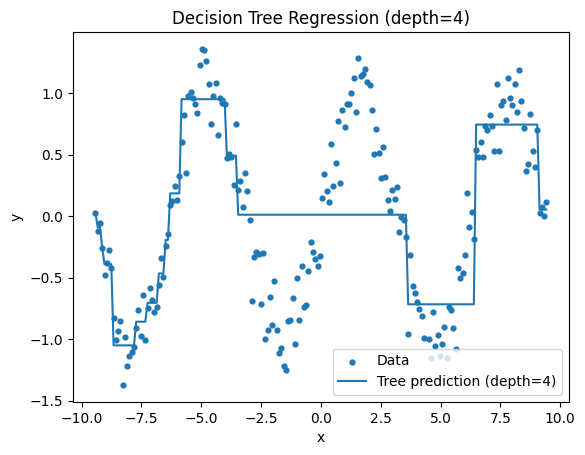

Depth=8: MSE=0.0125, R^2=0.9776


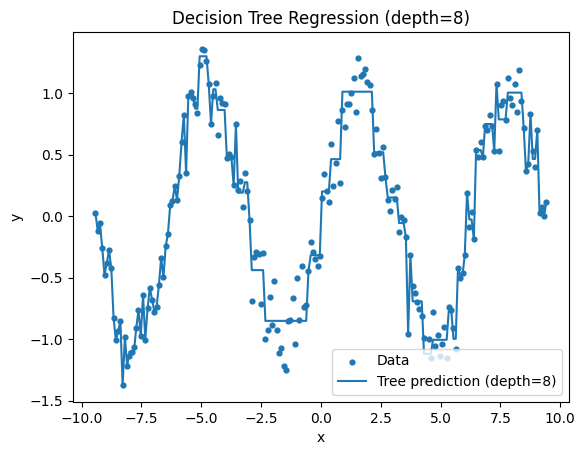

Depth=None: MSE=0.0000, R^2=1.0000


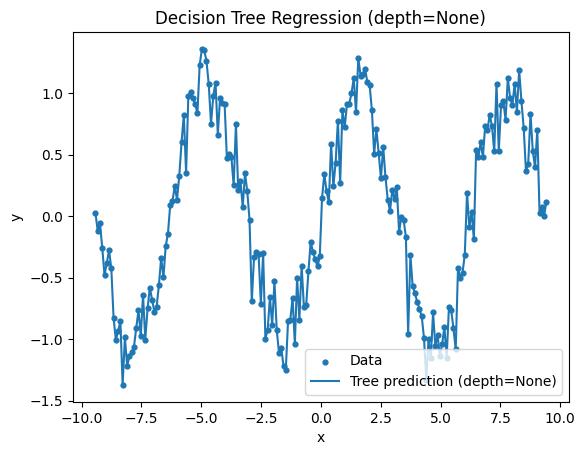

In [4]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Synthetic regression data: y = sin(x) + noise
rng = np.random.default_rng(0)
Xr = np.linspace(-3*np.pi, 3*np.pi, 200).reshape(-1, 1)
yr_true = np.sin(Xr).ravel()
noise = rng.normal(0, 0.2, size=yr_true.shape)
yr = yr_true + noise

# Fit trees with different depths and plot (each in separate figure)
for depth in [2, 4, 8, None]:  # None = full growth
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg.fit(Xr, yr)
    y_pred = reg.predict(Xr)
    print(f"Depth={depth}: MSE={mean_squared_error(yr, y_pred):.4f}, R^2={r2_score(yr, y_pred):.4f}")
    
    plt.figure()
    plt.scatter(Xr, yr, s=12, label="Data")
    plt.plot(Xr, y_pred, label=f"Tree prediction (depth={depth})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Decision Tree Regression (depth={depth})")
    plt.legend()
    plt.show()



## 14.11 Summary

- Decision trees split the feature space into regions using impurity reduction (entropy or Gini).  
- Hyperparameters and pruning control overfitting; cost‑complexity pruning formalizes the trade‑off.  
- Trees require little preprocessing but can have high variance; ensembles such as Random Forests and Gradient Boosting address this by averaging or boosting trees.
